Ottawa Vehicle Serious Collision Data Preparation


---


**Author**: Group 1

**Creation Date**: November 14, 2021

**Revision Date**: December 08, 2021


---


**Data Source**: Ottawa Open Data Portal

**Data**: https://open.ottawa.ca/search?q=fatality

**Data Dictionary**: 


---



The data captures information about serious vehicle collisions in the city of Ottawa Ontario. Intent is to compare City of Ottawa data with City of Toronto.

This notebook will prepare the data for analysis.



Note: In order to run this code you will need to create a shortcut to the shared drive in your Google drive and specify the path to the shortcut in the file_path variable.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import datetime
import time

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

file_path = '/content/drive/MyDrive/Foundations of Data Science - Group Project/Data Files/'  # Path to shared folder
file_in = '_Tabular_Transportation_Collision_Data.csv'

# Data Cleanup

In [4]:
# Functions for cleaning the data


def time_cleanup(x):
    if x == 'Unknown':
        return '00:00'
    elif len(x) > 12:
        return x[11:16]
    else:
        return x[:-6]

def time_cleanup2017(x):
    result = datetime.datetime.fromtimestamp ((int(x) - 18000000)// 1000)
    return result.time()

def date_cleanup2017(x):
    result = datetime.datetime.fromtimestamp(int(x)/1000)
    return result.date()

def date_cleanup(x):
    return x[:10]

def find_date_time(x):
    try:
        new_date = x['DATE'] + ' ' + x['TIME']
        result = pd.to_datetime(new_date)
    except TypeError:
        result = 'Unknown'
    except ParserError:
        result = 'Unknown'
    except BaseException:
        result = 'Unknown'

    return result

In [5]:
#Read 2017 data separately and cleanup date and time first due to different formatting from source
#2017 datetime formats has an issue
#date is in epoch format
#time is 13 digit time in milliseconds (need to clean erroneous Dec 31 1899 date)

file_content_2017 = pd.read_csv(file_path + '2017' + file_in, converters = {'Time': time_cleanup2017,'Date': date_cleanup2017}).rename(columns={'Date': 'DATE',
                                                        'Time': 'TIME',
                                                        'Year': 'YEAR',
                                                        'Location': 'LOCATION',
                                                        'Collision_Location': 'COLLISION_LOCATION',
                                                        'Collision_Classification': 'CLASSIFICATION',
                                                        'Impact_type': 'IMPACT_TYPE',
                                                        'Environment': 'ENVIRONMENT',
                                                        'Light': 'LIGHT',
                                                        'Road_Surface': 'ROAD_SURFACE',
                                                        'Traffic_Control': 'TRAFFIC_CONTROL',
                                                        'Latitude': 'LATITUDE',
                                                        'Longitude': 'LONGITUDE'
                                        })

In [6]:
#add DATE_TIME column to 2017 df
file_content_2017['DATE'] = file_content_2017['DATE'].astype(str)
file_content_2017['TIME'] = file_content_2017['TIME'].astype(str)
file_content_2017['DATE_TIME'] = file_content_2017['DATE'] + ' ' + file_content_2017['TIME']

In [7]:
file_content_2017.head()

Record                           LOCATION  ...  FID            DATE_TIME
0     101        AIRPORT PKWY @ HUNT CLUB RD  ...    1  2017-01-13 14:48:00
1     102        AIRPORT PKWY @ HUNT CLUB RD  ...    2  2017-03-15 07:51:00
2     103        AIRPORT PKWY @ HUNT CLUB RD  ...    3  2017-04-19 13:31:00
3     104        AIRPORT PKWY @ HUNT CLUB RD  ...    4  2017-12-21 08:38:00
4     105  AIRPORT PKWY @ UPLANDS DR RAMP 62  ...    5  2017-10-30 03:20:00

[5 rows x 18 columns]

In [8]:
# Read all remaining years information into a dataframe

file_content = pd.read_csv(file_path + '2013' + file_in,
                           nrows = None,
#                           index_col='COLLISION_ID',
                           converters = {'TIME': time_cleanup,
                                         'DATE': date_cleanup,
                                        }
                            ).rename(columns={'Accident_Date': 'DATE',
                                                  'Accident_Time': 'TIME',
                                                  'Year': 'YEAR',
                                                  'Location': 'LOCATION',
                                                  'Collision_Location': 'COLLISION_LOCATION',
                                                  'Accident_Location': 'COLLISION_LOCATION',
                                                  'ACCIDENT_LOCATION': 'COLLISION_LOCATION',
                                                  'Classification': 'CLASSIFICATION',
                                                  'Collision_Classification': 'CLASSIFICATION',
                                                  'COLLISION_CLASSIFICATION': 'CLASSIFICATION',
                                                  'CLASS_OF_ACCIDENT': 'CLASSIFICATION',
                                                  'ANOM_ID': 'COLLISION_ID',
                                                  'Initial_Impact_Type': 'IMPACT_TYPE',
                                                  'INITIAL_IMPACT_TYPE': 'IMPACT_TYPE',
                                                  'Impact_Type': 'IMPACT_TYPE',
                                                  'Impact_type': 'IMPACT_TYPE',
                                                  'Environment': 'ENVIRONMENT',
                                                  'Light': 'LIGHT',
                                                  'Road_Surface': 'ROAD_SURFACE',
                                                  'SURFACE_CONDITION': 'ROAD_SURFACE',
                                                  'ROAD_SURFACE_CONDITION': 'ROAD_SURFACE',
                                                  'Traffic_Control': 'TRAFFIC_CONTROL',
                                                  'Traffic_Control_Condition': 'TRAFFIC_CONTROL_CONDITION',
                                                  'Number_of_Pedestrians': 'NUMBER_OF_PEDESTRIANS',
                                                  'NO_OF_PEDESTRIANS': 'NUMBER_OF_PEDESTRIANS',
                                                  'Latitude': 'LATITUDE',
                                                  'Longitude': 'LONGITUDE'
                                                  })
                               
additional_years = ['2014', '2015', '2016', '2018', '2019']
for y in additional_years:
    file_content = file_content.append(
                    pd.read_csv(file_path + y + file_in,
                                nrows = None,
                                converters = {'TIME': time_cleanup, 
                                              'Accident_Time': time_cleanup,
                                              'DATE': date_cleanup,
                                              'Accident_Date': date_cleanup
                                              }
                                ).rename(columns={'Accident_Date': 'DATE',
                                                  'Accident_Time': 'TIME',
                                                  'Year': 'YEAR',
                                                  'Location': 'LOCATION',
                                                  'Collision_Location': 'COLLISION_LOCATION',
                                                  'Accident_Location': 'COLLISION_LOCATION',
                                                  'ACCIDENT_LOCATION': 'COLLISION_LOCATION',
                                                  'Classification': 'CLASSIFICATION',
                                                  'Collision_Classification': 'CLASSIFICATION',
                                                  'COLLISION_CLASSIFICATION': 'CLASSIFICATION',
                                                  'CLASS_OF_ACCIDENT': 'CLASSIFICATION',
                                                  'ANOM_ID': 'COLLISION_ID',
                                                  'Initial_Impact_Type': 'IMPACT_TYPE',
                                                  'INITIAL_IMPACT_TYPE': 'IMPACT_TYPE',
                                                  'Impact_Type': 'IMPACT_TYPE',
                                                  'Impact_type': 'IMPACT_TYPE',
                                                  'Environment': 'ENVIRONMENT',
                                                  'Light': 'LIGHT',
                                                  'Road_Surface': 'ROAD_SURFACE',
                                                  'SURFACE_CONDITION': 'ROAD_SURFACE',
                                                  'ROAD_SURFACE_CONDITION': 'ROAD_SURFACE',
                                                  'Traffic_Control': 'TRAFFIC_CONTROL',
                                                  'Traffic_Control_Condition': 'TRAFFIC_CONTROL_CONDITION',
                                                  'Number_of_Pedestrians': 'NUMBER_OF_PEDESTRIANS',
                                                  'NO_OF_PEDESTRIANS': 'NUMBER_OF_PEDESTRIANS',
                                                  'Latitude': 'LATITUDE',
                                                  'Longitude': 'LONGITUDE'
                                                  }),ignore_index=True)
    


In [9]:
file_content['DATE_TIME'] = file_content.apply(find_date_time, axis=1)
file_content

DATE   TIME COLLISION_ID  ... ObjectId    Geo_ID           DATE_TIME
0      2013/01/18  23:13       13-704  ...      NaN       NaN 2013-01-18 23:13:00
1      2013/01/20  18:45       13-806  ...      NaN       NaN 2013-01-20 18:45:00
2      2013/01/03  21:22       13-101  ...      NaN       NaN 2013-01-03 21:22:00
3      2013/01/12  21:10       13-502  ...      NaN       NaN 2013-01-12 21:10:00
4      2013/01/11  04:00       13-503  ...      NaN       NaN 2013-01-11 04:00:00
...           ...    ...          ...  ...      ...       ...                 ...
89985  2019/11/19  17:30          NaN  ...      NaN  __3ZA2LE 2019-11-19 17:30:00
89986  2019/11/19  17:55          NaN  ...      NaN  __3ZA29B 2019-11-19 17:55:00
89987  2019/11/19  19:36          NaN  ...      NaN      4216 2019-11-19 19:36:00
89988  2019/11/19  17:00          NaN  ...      NaN  __3ZA2R3 2019-11-19 17:00:00
89989  2019/11/19  17:25          NaN  ...      NaN  __3ZAY46 2019-11-19 17:25:00

[89990 rows x 23 columns]

In [10]:
#append 2017 year to dataframe
file_content = file_content.append(file_content_2017, ignore_index=True)

In [11]:
file_content.info()
#104384 total entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104384 entries, 0 to 104383
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   DATE                       104384 non-null  object 
 1   TIME                       104384 non-null  object 
 2   COLLISION_ID               73591 non-null   object 
 3   LOCATION                   104384 non-null  object 
 4   X                          104384 non-null  float64
 5   Y                          104384 non-null  float64
 6   LONGITUDE                  104384 non-null  float64
 7   LATITUDE                   104384 non-null  float64
 8   ENVIRONMENT                104383 non-null  object 
 9   LIGHT                      104384 non-null  object 
 10  ROAD_SURFACE               104384 non-null  object 
 11  TRAFFIC_CONTROL            104336 non-null  object 
 12  TRAFFIC_CONTROL_CONDITION  46084 non-null   object 
 13  CLASSIFICATION             10

In [12]:
#remove columns that do not contain meaningful data
file_content.drop(columns=['DATE', 'TIME', 'COLLISION_ID', 'FID', 'YEAR', 'GEO_ID', 'ObjectId', 'Geo_ID', 'Record'], inplace=True)

In [13]:
file_content.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104384 entries, 0 to 104383
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   LOCATION                   104384 non-null  object 
 1   X                          104384 non-null  float64
 2   Y                          104384 non-null  float64
 3   LONGITUDE                  104384 non-null  float64
 4   LATITUDE                   104384 non-null  float64
 5   ENVIRONMENT                104383 non-null  object 
 6   LIGHT                      104384 non-null  object 
 7   ROAD_SURFACE               104384 non-null  object 
 8   TRAFFIC_CONTROL            104336 non-null  object 
 9   TRAFFIC_CONTROL_CONDITION  46084 non-null   object 
 10  CLASSIFICATION             104384 non-null  object 
 11  IMPACT_TYPE                104384 non-null  object 
 12  NUMBER_OF_PEDESTRIANS      89990 non-null   float64
 13  COLLISION_LOCATION         45

In [14]:
#fill missing values
file_content['ENVIRONMENT'].fillna('00 - Unknown', inplace = True)
file_content['TRAFFIC_CONTROL'].fillna('00 - Unknown', inplace = True)
file_content['NUMBER_OF_PEDESTRIANS'].fillna('Unknown', inplace = True)
file_content['COLLISION_LOCATION'].fillna('00 - Unknown', inplace = True)

#for missing values in ‘TRAFFIC_CONTROL_CONDITION’, if 'TRAFFIC_CONTROL' is noted as "10 - No control"
#then fill blank as "10 - No control"
file_content['TRAFFIC_CONTROL_CONDITION'] = np.where(file_content['TRAFFIC_CONTROL']=='10 - No control', 
                                                     '10 - No control', file_content['TRAFFIC_CONTROL_CONDITION'])
#remaining null values are truly unknown, so fill as "00 - Unknown"
file_content['TRAFFIC_CONTROL_CONDITION'].fillna('00 - Unknown', inplace = True)

In [15]:
file_content["DATE_TIME"] = pd.to_datetime(file_content["DATE_TIME"])

In [16]:
file_content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104384 entries, 0 to 104383
Data columns (total 15 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   LOCATION                   104384 non-null  object        
 1   X                          104384 non-null  float64       
 2   Y                          104384 non-null  float64       
 3   LONGITUDE                  104384 non-null  float64       
 4   LATITUDE                   104384 non-null  float64       
 5   ENVIRONMENT                104384 non-null  object        
 6   LIGHT                      104384 non-null  object        
 7   ROAD_SURFACE               104384 non-null  object        
 8   TRAFFIC_CONTROL            104384 non-null  object        
 9   TRAFFIC_CONTROL_CONDITION  104384 non-null  object        
 10  CLASSIFICATION             104384 non-null  object        
 11  IMPACT_TYPE                104384 non-null  object  

In [17]:
file_content.to_csv('ottawa_file_raw.csv')

# Mapping

In [18]:
import plotly.express as px
import plotly.graph_objects as go
px.set_mapbox_access_token("pk.eyJ1IjoibWFnZ2llLWxhdSIsImEiOiJja3dpcmRiYTgxYjhqMnlvNHB0ZXd4YWN4In0.9MuO3_4p5_DyHyUbDClL0Q")

fig = go.Figure()

fig = px.scatter_mapbox(file_content, lat="LATITUDE", lon="LONGITUDE", color_continuous_scale=px.colors.cyclical.IceFire, size_max=20,zoom=12)



fig.show()

# Data Analysis

In [19]:
#collisions involving pedestrians, bucketed by year

#create separate df for pedestrian data as we will be dropping unknowns
file_content["YEAR"]= file_content["DATE_TIME"].dt.year
ott_ped = file_content[["DATE_TIME", "YEAR", "CLASSIFICATION", "NUMBER_OF_PEDESTRIANS"]].copy()

#drop unknown pedestrian incidents
ott_ped.drop(ott_ped[ott_ped["NUMBER_OF_PEDESTRIANS"] == "Unknown"].index, inplace=True)

#convert to integer
ott_ped["NUMBER_OF_PEDESTRIANS"].astype(int)

#create new column for pedestrian flag
ott_ped["PEDESTRIAN"] = np.where(ott_ped["NUMBER_OF_PEDESTRIANS"] > 0, 1, 0)

ott_ped.to_csv('Ottawa_pedestrians.csv')


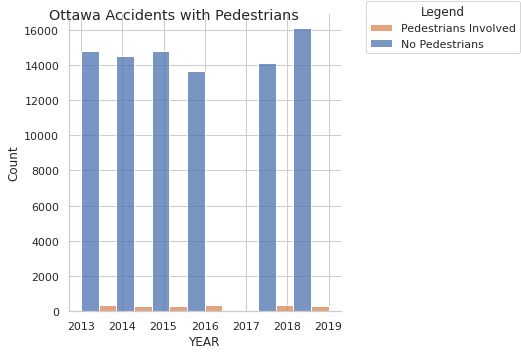

In [20]:
#plot pedestrian collisions
ott_ped_plot = sns.displot(data=ott_ped, x="YEAR", hue = "PEDESTRIAN", multiple="dodge", bins=7, legend=False)

ott_ped_plot.fig.suptitle("Ottawa Accidents with Pedestrians")
ott_ped_plot.fig.legend(title = "Legend", labels=["Pedestrians Involved","No Pedestrians"], loc=2, bbox_to_anchor=(1,1))


Text(0.5, 1.05, 'Ottawa Fatal Accidents with Pedestrians')

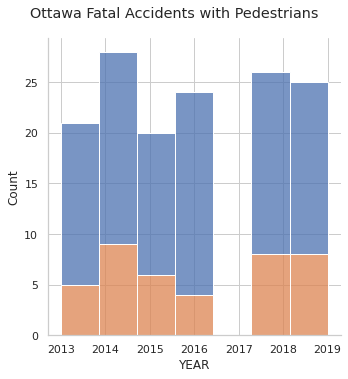

In [21]:
#what about collisions with fatalities only
ped_fat = ott_ped.loc[ott_ped['CLASSIFICATION']=='01 - Fatal injury'].reset_index()


ott_ped_fat_plot = sns.displot (data=ped_fat, x="YEAR", hue="PEDESTRIAN", multiple="stack", bins=7, legend=False)
ott_ped_fat_plot.fig.suptitle("Ottawa Fatal Accidents with Pedestrians", y=1.05)
#ott_ped_fat_plot.fig.legend(title = "Legend", labels=["Pedestrians Involved","No Pedestrians"], loc=2, bbox_to_anchor=(1,1))


In [22]:
#import and prepare Toronto data for comparison
toronto = pd.read_csv(file_path + 'KSI_Incidents.csv')
toronto['DATE_TIME'] = toronto['DATE_TIME'].astype('datetime64[ns]')
 
toronto["YEAR"]= toronto["DATE_TIME"].dt.year
tor_df = toronto.copy()

#drop all years but 2013-2019 to match Ottawa 
tor_df.drop(tor_df[tor_df["YEAR"] < 2013].index, inplace=True)
tor_df.drop(tor_df[tor_df["YEAR"] == 2020].index, inplace=True)

#drop all entries but fatalities to match Ottawa data
tor_df.drop(tor_df[tor_df["ACCLASS"] == "Non-Fatal Injury"].index, inplace=True)
tor_df.drop(tor_df[tor_df["ACCLASS"] == "Property Damage Only"].index, inplace=True)


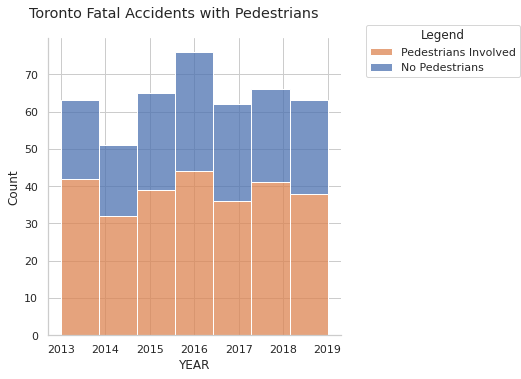

In [23]:
#create new column for pedestrian flag
tor_df["PEDESTRIAN"] = np.where(tor_df["IMPACTYPE"] == "Pedestrian Collisions", 1, 0)

#plot pedestrian collisions - TORONTO
tor_ped_fat_plot = sns.displot (data=tor_df, x="YEAR", hue="PEDESTRIAN", multiple="stack", bins=7, legend=False)
tor_ped_fat_plot.fig.suptitle("Toronto Fatal Accidents with Pedestrians", y=1.05)
tor_ped_fat_plot.fig.legend(title = "Legend", labels=["Pedestrians Involved","No Pedestrians"], loc=2, bbox_to_anchor=(1,1))

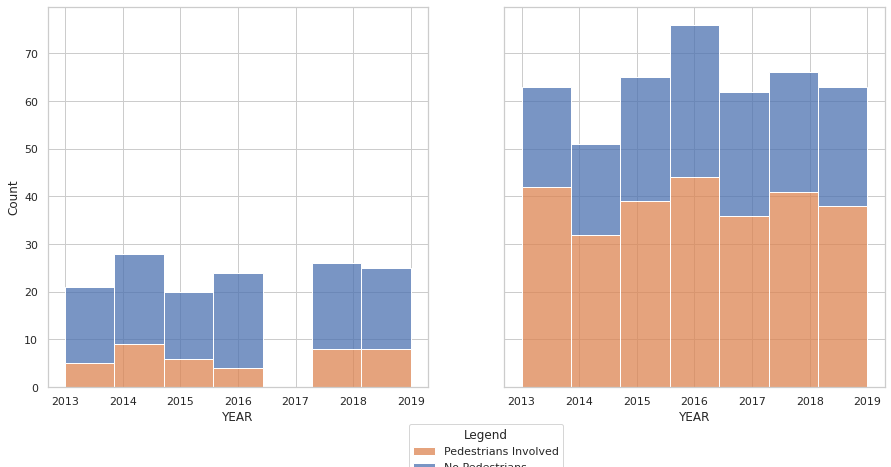

In [24]:
#combine plots

fig, axs = plt.subplots (1, 2, figsize=(15, 7), sharey=True)

sns.histplot (data=ped_fat, x="YEAR", hue="PEDESTRIAN", multiple="stack", bins=7, legend=False, ax=axs[0])
sns.histplot (data=tor_df, x="YEAR", hue="PEDESTRIAN", multiple="stack", bins=7, legend=False, ax=axs[1])

fig.legend(title = "Legend", labels=["Pedestrians Involved","No Pedestrians"], loc="lower center", bbox_to_anchor=(.45, -.03))

plt.show()

In [25]:
# Function to determine season
from datetime import date

def season_of_date(my_date):

  Y = my_date.year

  seasons = [('Winter', (date(Y,  1,  1),  date(Y,  3, 20))),
             ('Spring', (date(Y,  3, 21),  date(Y,  6, 20))),
             ('Summer', (date(Y,  6, 21),  date(Y,  9, 22))),
             ('Autumn', (date(Y,  9, 23),  date(Y, 12, 20))),
             ('Winter', (date(Y, 12, 21),  date(Y, 12, 31)))]

  return next(season for season, (start, end) in seasons if start <= my_date <= end)

#Collisions categorized by season, day of the week
ped_fat["Season"]=ped_fat["DATE_TIME"]
ped_fat["Season"]=ped_fat["Season"].apply(lambda x: season_of_date(x))

#add column for day of the week
ped_fat["Weekday"]=ped_fat["DATE_TIME"]
ped_fat["Weekday"]=ped_fat["Weekday"].apply(lambda x: x.weekday())

#add column for hour of the day
ped_fat["Hour"]=ped_fat["DATE_TIME"]
ped_fat["Hour"]=ped_fat["Hour"].apply(lambda x: x.hour)


#Categorize Season, weekday, hour for Toronto as well
#Collisions categorized by season, day of the week
tor_df["Season"]=tor_df["DATE_TIME"]
tor_df["Season"]=tor_df["Season"].apply(lambda x: season_of_date(x))

#add column for day of the week
tor_df["Weekday"]=tor_df["DATE_TIME"]
tor_df["Weekday"]=tor_df["Weekday"].apply(lambda x: x.weekday())

#add column for hour of the day
tor_df["Hour"]=tor_df["DATE_TIME"]
tor_df["Hour"]=tor_df["Hour"].apply(lambda x: x.hour)

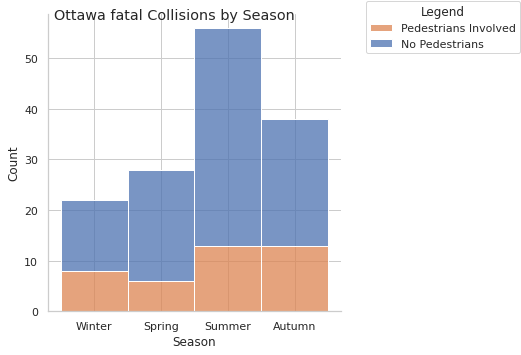

In [26]:
#plot fatal collisions by season

ott_season_plot = sns.displot(data=ped_fat, x="Season", hue="PEDESTRIAN", multiple="stack", legend=False)
ott_season_plot.fig.suptitle("Ottawa fatal Collisions by Season")
ott_season_plot.fig.legend(title = "Legend", labels=["Pedestrians Involved","No Pedestrians"], loc=2, bbox_to_anchor=(1,1))

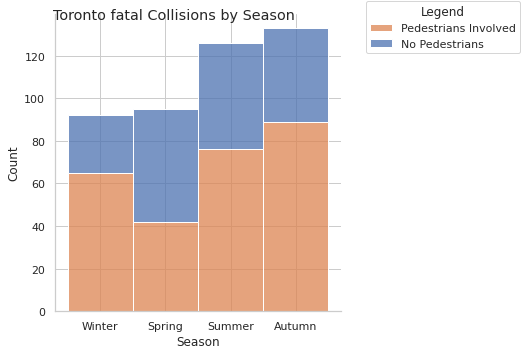

In [27]:
#plot fatal collisions by season in Toronto
tor_df['Season'] = pd.Categorical(tor_df['Season'], categories = ['Winter', 'Spring', 'Summer', 'Autumn'], ordered = True) #order seasons
tor_season_plot = sns.displot(data=tor_df, x="Season", hue="PEDESTRIAN", multiple="stack", legend=False)
tor_season_plot.fig.suptitle("Toronto fatal Collisions by Season")
tor_season_plot.fig.legend(title = "Legend", labels=["Pedestrians Involved","No Pedestrians"], loc=2, bbox_to_anchor=(1,1))

Text(0.5, 1.05, 'Ottawa Fatal Collisions by Day of the Week')

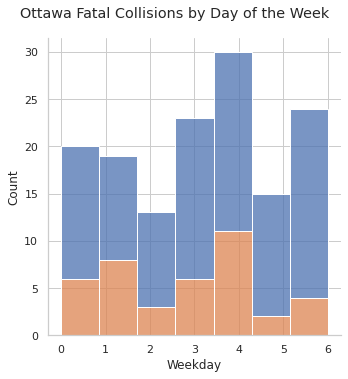

In [28]:
#plot total collisions by week day
ott_weekday_plot = sns.displot(data=ped_fat, x="Weekday", hue="PEDESTRIAN", multiple="stack", bins=7, legend = False)
ott_weekday_plot.fig.suptitle("Ottawa Fatal Collisions by Day of the Week", y=1.05)

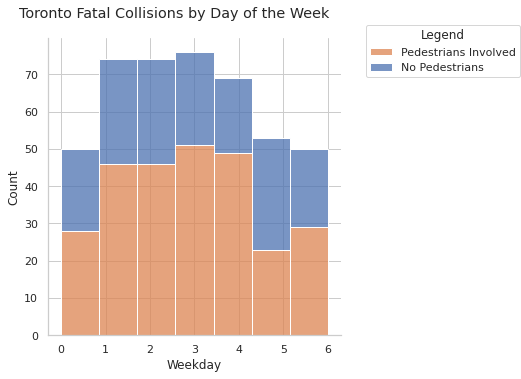

In [29]:
#plot total collisions by week day for Toronto
tor_weekday_plot = sns.displot(data=tor_df, x="Weekday", hue="PEDESTRIAN", multiple="stack", bins=7, legend = False)
tor_weekday_plot.fig.suptitle("Toronto Fatal Collisions by Day of the Week", y=1.05)
tor_weekday_plot.fig.legend(title = "Legend", labels=["Pedestrians Involved","No Pedestrians"], loc=2, bbox_to_anchor=(1,1))

Text(0.5, 1.05, 'Ottawa Fatal Collisions by Hour of Day')

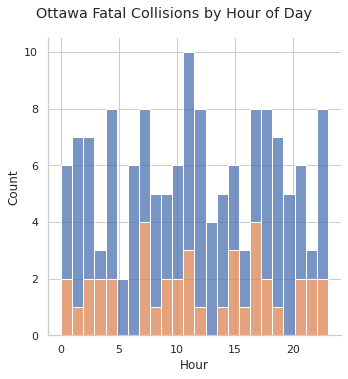

In [30]:
#plot total collisions by time
ott_time_plot = sns.displot(data=ped_fat, x="Hour", hue="PEDESTRIAN", multiple="stack", bins=24, legend = False)
ott_time_plot.fig.suptitle("Ottawa Fatal Collisions by Hour of Day", y=1.05)

In [31]:
ped_fat.to_csv("Pedestrian_Fatalities_Ottawa.csv")

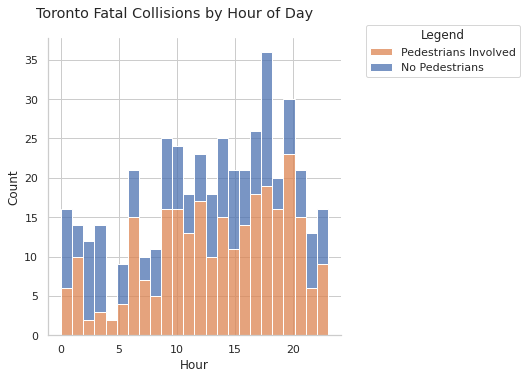

In [32]:
#plot total collisions by time - Toronto
tor_time_plot = sns.displot(data=tor_df, x="Hour", hue="PEDESTRIAN", multiple="stack", bins=24, legend = False)
tor_time_plot.fig.suptitle("Toronto Fatal Collisions by Hour of Day", y=1.05)
tor_time_plot.fig.legend(title = "Legend", labels=["Pedestrians Involved","No Pedestrians"], loc=2, bbox_to_anchor=(1,1))

# Predictions

In [33]:
#Can severity/classification of collision be predicted?

from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import scipy, scipy.stats



/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [34]:
#attempt OLS model

#create copy of original df for OLS model
ols_ottawa = file_content.copy()

#Collisions categorized by season, day of the week
ols_ottawa["Season"]=ols_ottawa["DATE_TIME"]
ols_ottawa["Season"]=ols_ottawa["Season"].apply(lambda x: season_of_date(x))

#add column for day of the week
ols_ottawa["Weekday"]=ols_ottawa["DATE_TIME"]
ols_ottawa["Weekday"]=ols_ottawa["Weekday"].apply(lambda x: x.weekday())

#add column for hour of the day
ols_ottawa["Hour"]=ols_ottawa["DATE_TIME"]
ols_ottawa["Hour"]=ols_ottawa["Hour"].apply(lambda x: x.hour)

In [35]:
ols_Y = ols_ottawa['CLASSIFICATION'].astype('category').cat.codes
ols_X = ols_ottawa[['ENVIRONMENT', 'LIGHT', 'ROAD_SURFACE', 'TRAFFIC_CONTROL', 'TRAFFIC_CONTROL_CONDITION', 'IMPACT_TYPE', 'NUMBER_OF_PEDESTRIANS',
                      'Season', 'Hour']]

#ols_Y = pd.get_dummies(data=ols_Y)
ols_X = pd.get_dummies(data=ols_X, drop_first=True)

ols_X = sm.add_constant(ols_X)

In [36]:
ols_results = sm.OLS(ols_Y, ols_X).fit()
print(ols_results.summary())

#R2 0.125, OLS not a good model

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.125
Model:                            OLS   Adj. R-squared:                  0.124
Method:                 Least Squares   F-statistic:                     251.8
Date:                Fri, 10 Dec 2021   Prob (F-statistic):               0.00
Time:                        02:07:59   Log-Likelihood:                -43891.
No. Observations:              104384   AIC:                         8.790e+04
Df Residuals:                  104324   BIC:                         8.848e+04
Df Model:                          59                                         
Covariance Type:            nonrobust                                         
                                                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------

In [37]:
#Attempt Random Forest classifier model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

rf_y = ols_ottawa['CLASSIFICATION'].astype('category').cat.codes
rf_X = ols_ottawa[['ENVIRONMENT', 'LIGHT', 'ROAD_SURFACE', 'TRAFFIC_CONTROL', 'TRAFFIC_CONTROL_CONDITION', 'IMPACT_TYPE', 'NUMBER_OF_PEDESTRIANS',
                      'Season', 'Hour']]

rf_y = pd.get_dummies(data=rf_y)
rf_X = pd.get_dummies(data=rf_X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(rf_X, rf_y, test_size=0.2)

In [38]:
rf_clf = RandomForestClassifier(n_estimators=100)

rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [39]:
y_pred = rf_clf.predict(X_test)

In [40]:
from sklearn import metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.808928485893567


In [41]:
#find most important features in the model
feature_scores = pd.Series(rf_clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores
#The most important feature is hour, whether pedestrians were involved, and then impact type.

Hour                                              0.435048
NUMBER_OF_PEDESTRIANS_1.0                         0.145136
IMPACT_TYPE_04 - Sideswipe                        0.030889
IMPACT_TYPE_07 - SMV other                        0.029670
IMPACT_TYPE_06 - SMV unattended vehicle           0.026295
Season_Winter                                     0.022479
NUMBER_OF_PEDESTRIANS_Unknown                     0.020944
Season_Spring                                     0.019969
IMPACT_TYPE_03 - Rear end                         0.018488
TRAFFIC_CONTROL_CONDITION_01 - Functioning        0.016402
Season_Summer                                     0.015816
IMPACT_TYPE_05 - Turning movement                 0.015723
LIGHT_01 - Daylight                               0.014724
IMPACT_TYPE_02 - Angle                            0.014143
LIGHT_07 - Dark                                   0.013972
ROAD_SURFACE_02 - Wet                             0.011650
ENVIRONMENT_01 - Clear                            0.0115

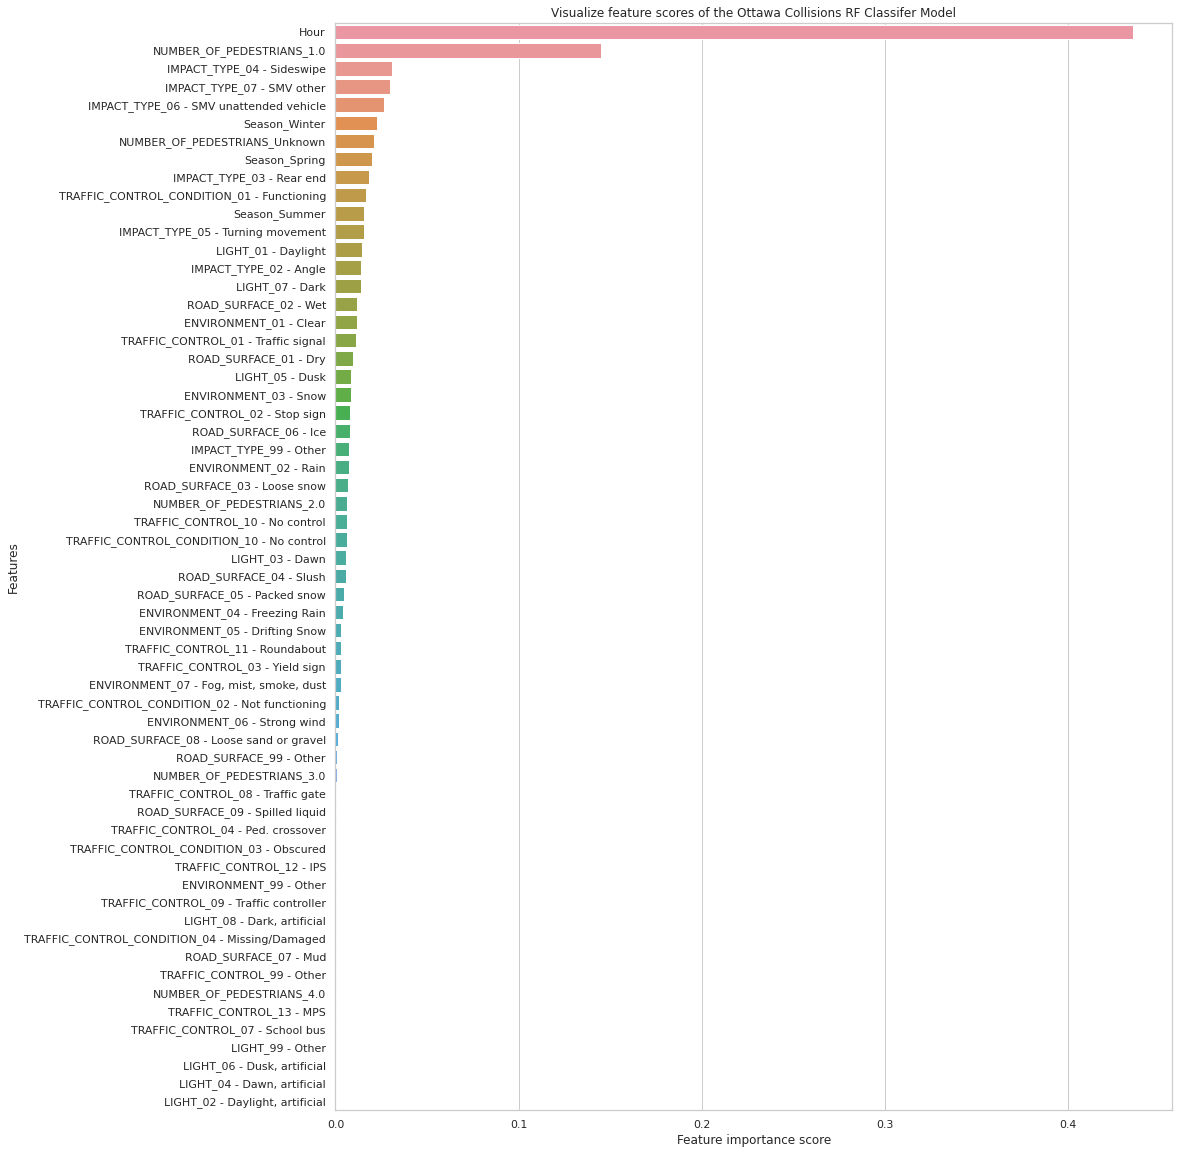

In [42]:
#visualize important features
f, ax = plt.subplots(figsize=(15, 20))
ax = sns.barplot(x=feature_scores, y=feature_scores.index, data=ols_ottawa)
ax.set_title("Visualize feature scores of the Ottawa Collisions RF Classifer Model")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [61]:
#Repeat RF model with narrowed down feature set based on feature importance
rf_y = ols_ottawa['CLASSIFICATION'].astype('category').cat.codes
rf_X = ols_ottawa[['ROAD_SURFACE', 'IMPACT_TYPE', 'NUMBER_OF_PEDESTRIANS','Season', 'Hour']]

rf_y = pd.get_dummies(data=rf_y)
rf_X = pd.get_dummies(data=rf_X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(rf_X, rf_y, test_size=0.2)

rf_clf = RandomForestClassifier(n_estimators=100)

rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8272261340230876


In [56]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        35
           1       0.67      0.12      0.20      3778
           2       0.83      0.99      0.90     17064

   micro avg       0.83      0.83      0.83     20877
   macro avg       0.50      0.37      0.37     20877
weighted avg       0.80      0.83      0.77     20877
 samples avg       0.83      0.83      0.83     20877



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.



In [63]:
tor_df.to_csv("Toronto_Dataframe.csv")

In [64]:
#need to use original Toronto df with both fatal and non fatal incidents

#Categorize Season, weekday, hour for Toronto as well
#Collisions categorized by season, day of the week
toronto["Season"]=toronto["DATE_TIME"]
toronto["Season"]=toronto["Season"].apply(lambda x: season_of_date(x))

#add column for hour of the day
toronto["Hour"]=toronto["DATE_TIME"]
toronto["Hour"]=toronto["Hour"].apply(lambda x: x.hour)

In [65]:
#Repeat Analysis for Toronto Data
rf_y_tor = toronto['ACCLASS'].astype('category').cat.codes
rf_X_tor = toronto[['VISIBILITY', 'LIGHT', 'RDSFCOND', 'TRAFFCTL', 'IMPACTYPE', 'INVOLVED',
                      'Season', 'Hour']]

rf_y_tor = pd.get_dummies(data=rf_y_tor)
rf_X_tor = pd.get_dummies(data=rf_X_tor, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(rf_X_tor, rf_y_tor, test_size=0.2)

rf_clf_tor = RandomForestClassifier(n_estimators=100)

rf_clf_tor.fit(X_train, y_train)

y_pred = rf_clf_tor.predict(X_test)

print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8175


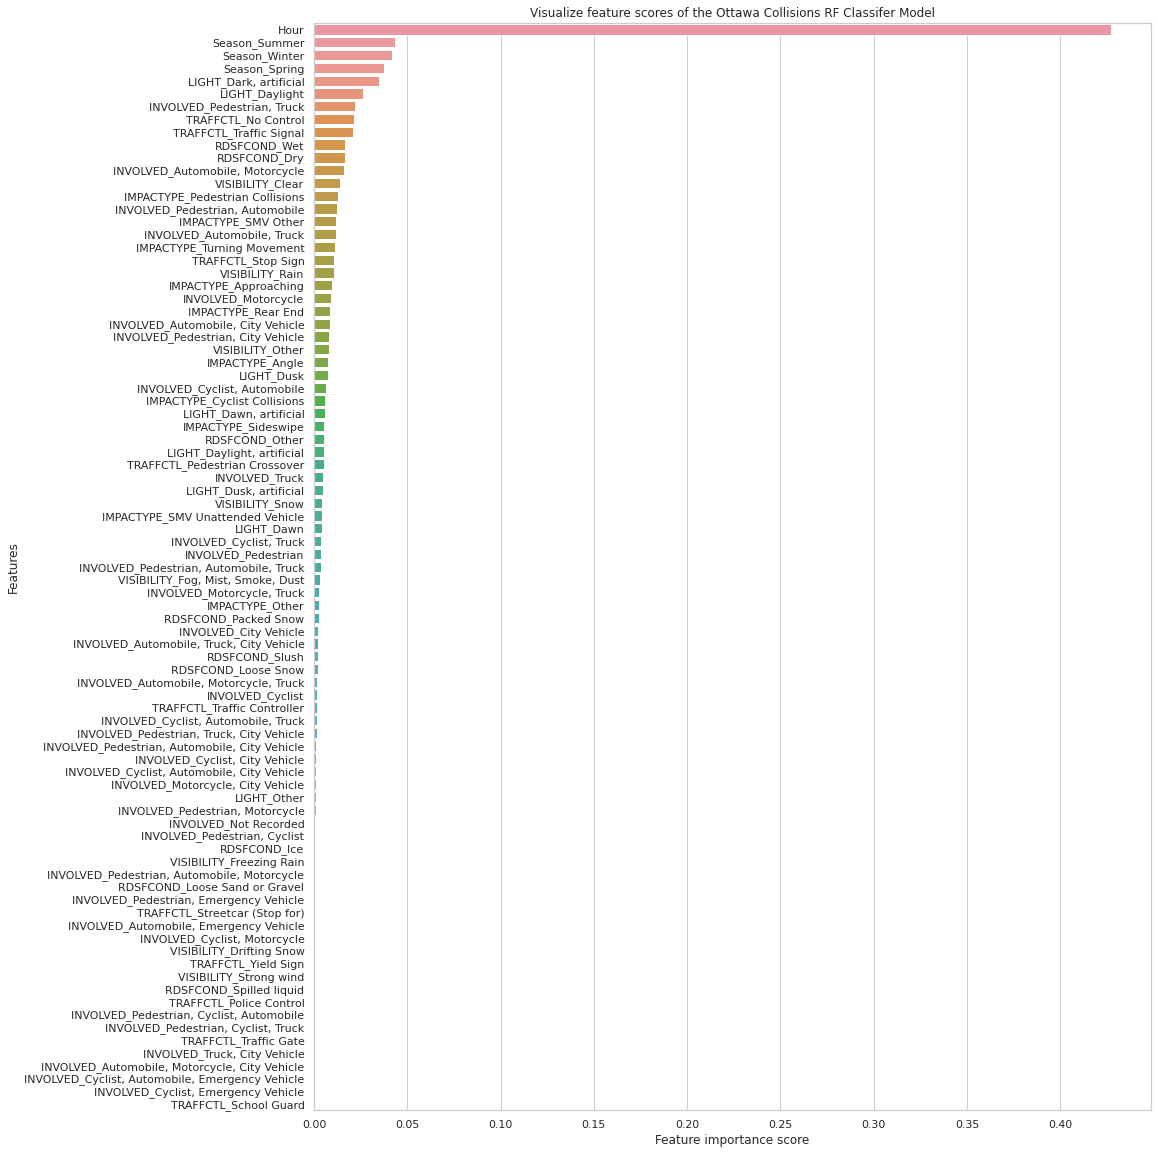

In [66]:
#find most important features in the model
feature_scores = pd.Series(rf_clf_tor.feature_importances_, index=X_train.columns).sort_values(ascending=False)

#visualize important features
f, ax = plt.subplots(figsize=(15, 20))
ax = sns.barplot(x=feature_scores, y=feature_scores.index, data=toronto)
ax.set_title("Visualize feature scores of the Ottawa Collisions RF Classifer Model")
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.16      0.08      0.11       163
           1       0.87      0.93      0.90      1037
           2       0.00      0.00      0.00         0

   micro avg       0.82      0.82      0.82      1200
   macro avg       0.34      0.34      0.34      1200
weighted avg       0.77      0.82      0.79      1200
 samples avg       0.82      0.82      0.82      1200



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.

